C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SES Metrics: {'MAE': 81.30251627600667, 'MSE': 8645.441567906446, 'RMSE': 92.98086667646439}
SMA Metrics: {'MAE': 62.34482758620689, 'MSE': 6217.777777777777, 'RMSE': 78.85288693369303}
HW Metrics: {'MAE': 67.25228452713198, 'MSE': 6104.5208904006795, 'RMSE': 78.1314334336743}


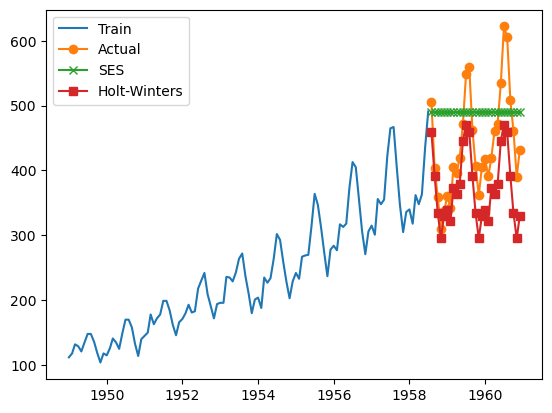

In [1]:
import pandas as pd
url ="AirPassengers - AirPassengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['#Passengers']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train).fit()
ses_pred = ses_model.forecast(len(test))

# Simple Moving Average (SMA)
window = 3
sma_pred = train.rolling(window=window).mean().iloc[-1]
sma_forecast = pd.Series([sma_pred] * len(test), index=test.index)

# Holt-Winters Smoothing
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
hw_pred = hw_model.forecast(len(test))

# ii. Calculate evaluation metrics
def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted);
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

print("SES Metrics:", calc_metrics(test, ses_pred))
print("SMA Metrics:", calc_metrics(test, sma_forecast))
print("HW Metrics:", calc_metrics(test, hw_pred))

# iii. Identify trends and seasonal patterns
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, ses_pred, label='SES', marker='x')
plt.plot(test.index, hw_pred, label='Holt-Winters', marker='s')
plt.legend()
plt.show() 